D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Legend does not support 'u0' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Legend does not support 'u1' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


Text(0.5, 1.0, 'Mass-Spring System')

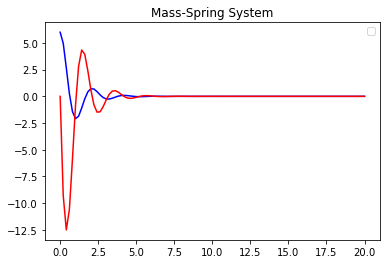

In [2]:
#modeling spring mass system
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate

#Make the following substitution to make system first order
#Y[1]=y′(t) and Y[0]=y(t),
#system: Y[0]'=Y[1] and Y[1]'=-c*Y[1]-k*Y[0]


#=======================================================
def eq(par,initial_cond,start_t,end_t,incr):
     #-time-grid-----------------------------------
     t  = np.linspace(start_t, end_t,incr)
     #differential-eq-system----------------------
     def funct(y,t):
        ut=y[0]
        ut_dt=y[1]
        c,k=par
        # the model equations u'=Y[1], u''=-k*Y[0]-c*Y[1] from u''+c*u'+k*u=0
        f0 =ut_dt
        f1 =-k*ut-c*ut_dt
        return [f0, f1]
     #integrate------------------------------------
     ds = integrate.odeint(funct,initial_cond,t)
     return (ds[:,0],ds[:,1],t)
#=======================================================

#parameters   
c=2. #spring coefficient 
k=10. #dampening coefficient

#collect parameters in tuple
coefs=(c,k)

# initial conditions

u0=6.
ud0=0.
y0=[u0,ud0]

start,stop,incr=0,20,100

#Solve and plot solution
F0,F1,T=eq(coefs,y0,start,stop,incr)
plt.figure()
plt.plot(T,F0,'-b',T,F1,'-r')
plt.legend(('u0', 'u1'),'upper center')
plt.title('Mass-Spring System')

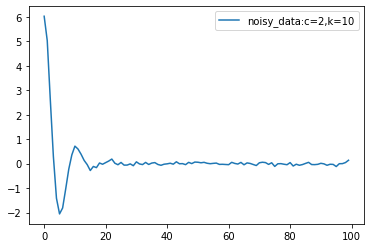

In [6]:
rand_i=np.random.randn(incr)
#noiselevel
nl=.05
noisy_data=F0+nl*rand_i
plt.plot(noisy_data,label="noisy_data:c=2,k=10")
plt.legend()

In [9]:
from scipy.optimize import fmin

#1.Get 'Real' Data
#====================================================
nd=noisy_data#solution with parameters: c=2,k=10
#====================================================

#2.Set up Info for Model System
#===================================================
# guess parameters   
c=1 #spring coefficient 
k=1 #dampening coefficient

#collect parameters in tuple
coefs=(c,k)

# initial conditions
u0=6.
ud0=0.
y0=[u0,ud0]

# model steps
#---------------------------------------------------
start_time=0
end_time=20
intervals=100
mt=np.linspace(start_time,end_time,intervals)

#3.Score Fit of System
#=========================================================
def score(coefs): #changed
    #a.Get Solution to system
    F0,F1,T=eq(coefs,y0,start_time,end_time,intervals)
    #b.Pick of Model Points to Compare
    um=F0
    #c.Score Difference between model(ode output) and data points (noisy data)
    ss=lambda data,model:((data-model)**2).sum()
    return ss(nd,um)
#========================================================


#4.Optimize Fit
#=======================================================
fit_score=score(coefs)
answ=fmin(score,(coefs))

Optimization terminated successfully.
         Current function value: 0.235295
         Iterations: 54
         Function evaluations: 105


In [12]:
print(answ==[c,k])
print(answ)
print(c,k)

[False False]
[ 2.05794399 10.09071066]
1 1
